## **Notebook name: <ins>Binary Classification with a Bank Churn Dataset</ins>**


## **<ins> Author: Farwa Khalid </ins>**


**Github [accout]("https://github.com/FarwaK05")**

**Keggel [account](https://www.kaggle.com/farwa99)**

**Linkdin [accout](https://www.linkedin.com/in/farwa-khalid-895527280/)**

# **About Dataset**

### **The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:**

1. Customer ID: A unique identifier for each customer
2. Surname: The customer's surname or last name
3. Credit Score: A numerical value representing the customer's credit score
4. Geography: The country where the customer resides (France, Spain, or Germany)
5. Gender: The customer's gender (Male or Female)
6. Age: The customer's age.
7. Tenure: The number of years the customer has been with the bank
8. Balance: The customer's account balance
9.  NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
10. HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
11. IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
12. EstimatedSalary: The estimated salary of the customer
13. Exited: Whether the customer has churned (1 = yes, 0 = no)


## <span style="color:green">Importing Important Libraries:</span>

In [261]:
import pandas as pd 
import seaborn as sns 
import numpy as np  
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
import tensorflow as tf
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# Importing data:

In [262]:
# Importing data:
df = pd.read_csv(r'C:\Users\Hello\Desktop\python_for_data_science\deep_learning\train.csv')


In [263]:
df_test = pd.read_csv(r'C:\Users\Hello\Desktop\python_for_data_science\deep_learning\test.csv')

# <ins>Uncover the Juicy Secrets of What the Data Whispers to Us!</ins> 🌊🕵️‍♂️📊

In [264]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [266]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [267]:
df_test.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [268]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


### **Hooray! Our dataset is rocking the party with zero missing values!It's a celebration of completeness and data joy!🎉🎊**

# Hunting for Duplicates! 🧐

In [269]:
# check duplicates in the data
print("Number of duplicates in the traning data:",df.duplicated().sum())
print("Number of duplicates in the testing data:",df_test.duplicated().sum())


Number of duplicates in the traning data: 0
Number of duplicates in the testing data: 0


### **Drumroll, please! Fantastic news – our data is a duplicate-free zone! 🚀🎉**

## <ins>Checking Out Our Columns: Let's Dive In!</ins>

## Diving into Surname Stories!

In [270]:
# exploring the surname:
df['Surname'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: Surname
Non-Null Count   Dtype 
--------------   ----- 
165034 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [271]:
df['Surname'].value_counts().sum()

165034

- **Every row brings its own flavor with a unique 'surname'! The sum of distinct values perfectly matches the row count, creating a harmony of individuality.**

## Delving into Credit Score Secrets!

Credit Score: A numerical value representing the customer's credit score

In [272]:
# exploring the credit score column:
df['CreditScore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: CreditScore
Non-Null Count   Dtype
--------------   -----
165034 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [273]:
df['CreditScore'].describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

The median of the df["CreditScore"] is =  659.0
The mean of the df["CreditScore"] is =  656.454373038283


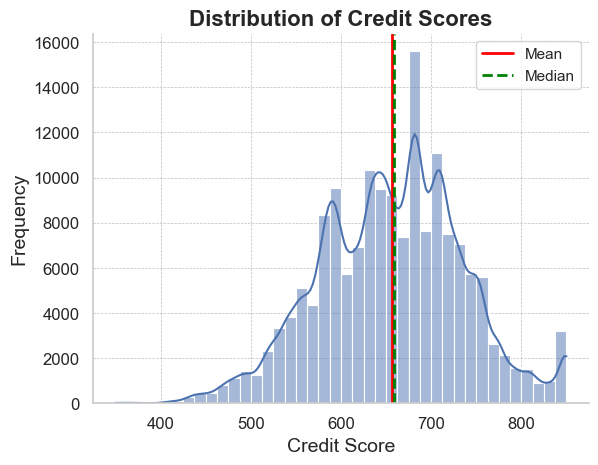

In [274]:
print('The median of the df["CreditScore"] is = ',df['CreditScore'].median())
print('The mean of the df["CreditScore"] is = ',df['CreditScore'].mean())

# Plot the histogram with a kernel density estimate (kde)
ax = sns.histplot(df['CreditScore'], kde=True, color='#4C72B0', bins=40)

# Calculate mean and median
mean_value = df['CreditScore'].mean()
median_value = df['CreditScore'].median()

# Add lines for mean and median
ax.axvline(mean_value, color='red', linestyle='-', linewidth=2, label='Mean')
ax.axvline(median_value, color='green', linestyle='--', linewidth=2, label='Median')

# Set plot title and labels
ax.set_title('Distribution of Credit Scores', fontsize=16, fontweight='bold')
ax.set_xlabel('Credit Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Customize the grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove the right and top spines for a cleaner look
sns.despine()

# Display a subtle background grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add a legend
ax.legend()

# Show the plot
plt.show()


### **Obervations:**
- **Taking a peek at the graph, it's crystal clear that the mean and median of df['CreditScore'] are practically holding hands! 📊🤝**


## Unearthing Geography Treasures!

In [275]:
df['Geography'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: Geography
Non-Null Count   Dtype 
--------------   ----- 
165034 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64


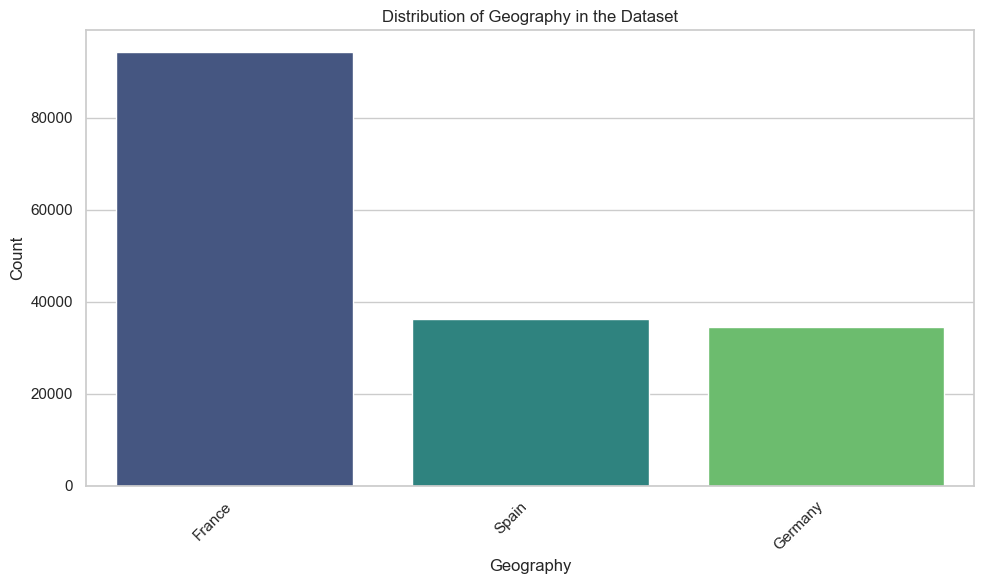

In [276]:
print(df['Geography'].value_counts())

geography_counts = df['Geography'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with 'Geography' assigned to hue
sns.barplot(x=geography_counts.index, y=geography_counts.values, hue=geography_counts.index, palette="viridis", legend=False)

# Set plot labels and title
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Distribution of Geography in the Dataset')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [277]:
print(df.groupby(['Geography'])['Gender'].value_counts())

import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
gender_counts = df.groupby(['Geography'])['Gender'].value_counts().unstack()

# Reshape data for Plotly
gender_counts = gender_counts.reset_index().melt(id_vars='Geography', var_name='Gender', value_name='Count')

# Create a grouped bar plot using Plotly
fig = px.bar(gender_counts, x='Geography', y='Count', color='Gender', barmode='group',
             labels={'Count': 'Count of Gender'},
             title='Distribution of Gender within Geography in the Dataset',
             color_discrete_map={'Male': 'teal', 'Female': 'salmon'})  # Updated colors

# Show the plot
fig.show()


Geography  Gender
France     Male      54239
           Female    39976
Germany    Male      18218
           Female    16388
Spain      Male      20693
           Female    15520
Name: count, dtype: int64


### **Obervation:**
- **The majority of people come from France, followed by Spain, and then Germany.**


## Navigating Gender Dimension!

In [278]:
# exploring column Gender:
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: Gender
Non-Null Count   Dtype 
--------------   ----- 
165034 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [279]:
df['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [280]:
# calculate the percentages of male and female value counts in the data
male_count =  93150
female_count = 71884
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

Male percentage in the data: 56.44%
Female Percentage in the data: 43.56%


### **Obervation:**
- The male are more in number then women 
- Male percentage in the data: 56.44%
- Female Percentage in the data: 43.56%

## Decoding the Age Column!

In [281]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
165034 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [282]:
df['Age'].describe()

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

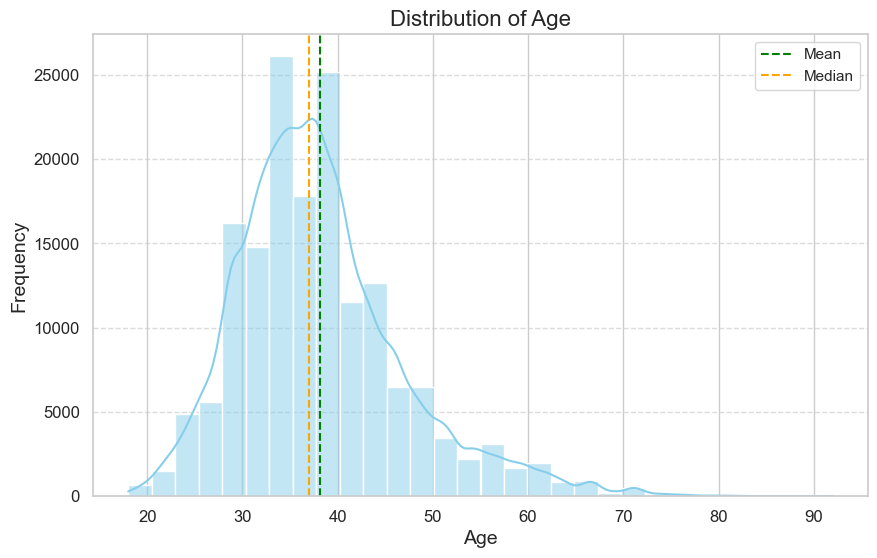

In [283]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram with a kernel density estimate (kde)
sns.histplot(df['Age'], kde=True, color='skyblue', bins=30, ax=ax)

# Calculate mean, median, and mode
mean_age = df['Age'].mean()
median_age = df['Age'].median()

# Add lines for mean, median, and mode
ax.axvline(x=mean_age, color='green', linestyle='--', label='Mean')
ax.axvline(x=median_age, color='orange', linestyle='--', label='Median')


# Set plot title and labels
ax.set_title('Distribution of Age', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Customize the grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

# Show legend
ax.legend()

# Show the plot
plt.show()


In [284]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram(data_frame=df, x='Age', color='Gender',
                   title='Distribution of Age by Gender',
                   labels={'Age': 'Age', 'Gender': 'Gender'},
                   template='plotly_white',  # Use a white template for a professional look
                   opacity=0.7,  # Set opacity for better visibility
                   color_discrete_map={'Male': '#3498db', 'Female': '#e74c3c'})  # Set custom colors

# Update layout for better presentation
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    legend_title='Gender',
    barmode='overlay'  # Overlay bars for better comparison
)

# Show the plot
fig.show()


In [285]:
grouped_stats = df.groupby('Geography')['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])

# Renaming the columns for clarity
grouped_stats.columns = ['mean_age', 'median_age', 'mode_age']

# Displaying the observations
print(grouped_stats.round())

           mean_age  median_age  mode_age
Geography                                
France         38.0        37.0      38.0
Germany        40.0        39.0      37.0
Spain          38.0        37.0      38.0


### **Obervation:**
- The highest age mentioned in the data is 92.
- The minimum age is 18 as.The minimum age required for a person to have a credit card is 18.
- The mean age in Germany is the highest among the three countries at 40.0.
- The median ages in France and Spain are the same at 37.0, while in Germany, it is slightly higher at 39.0.
- The mode age is 38.0 in both France and Spain, while it's 37.0 in Germany.

## Cracking Tenure's Code!

**Tenure: The number of years the customer has been with the bank**

In [286]:
df['Tenure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: Tenure
Non-Null Count   Dtype
--------------   -----
165034 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [287]:
df['Tenure'].describe()

count    165034.000000
mean          5.020353
std           2.806159
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64

In [288]:
df['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

In [289]:
import plotly.express as px
import pandas as pd

fig = px.bar(df.groupby(df['Tenure'])['Geography'].value_counts().reset_index(name='Count'),
             x='Tenure',
             y='Count',
             color='Geography',
             barmode='group',
             labels={'Count': 'Number of Customers'},
             title='Number of Customers by Tenure and Geography',
             template='plotly_dark'
             )

fig.update_layout(
    xaxis_title='Tenure',
    yaxis_title='Number of Customers',
    legend_title='Geography',
    legend=dict(title='Geography'),
)

# Show the plot
fig.show()


### **Oberavtions:**
- The unique values of the Tenure are 10 means the total years are 10.
- The highest count is associated with the year 2, with a count of 18,045.
- The second-highest count is for the year 7, with 17,810.
- Years 0 and 1 have relatively low counts, with 0 having the lowest count among all the years.
- The counts generally decrease as the years progress from 2 to 6, indicating a decreasing trend.
- Generally, there seems to be a decreasing trend in counts as the years progress, especially noticeable in France and Spain.
- France consistently has higher counts compared to Spain and Germany in most years.

## Balancing the Books: Unveiling "Balance"

Balance: The customer's account balance

In [290]:
df['Balance'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: Balance
Non-Null Count   Dtype  
--------------   -----  
165034 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [291]:
df['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

In [292]:
import plotly.express as px
import pandas as pd

fig = px.histogram(df, x='Balance', nbins=30,
                   labels={'Balance': 'Account Balance'},
                   title='Distribution of Account Balance with KDE',
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Account Balance',
    yaxis_title='Frequency',
    )

# Show the plot
fig.show()


### **Observations:**
- The mode of the Balance column is 0, as evident from the figure. This suggests that the majority of people have a balance of 0 on their credit cards.
- The highest value in the Balance column is 250,898.
- The mean value is 55,478.

## Decoding NumOfProducts Puzzle!

In [293]:
df['NumOfProducts'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: NumOfProducts
Non-Null Count   Dtype
--------------   -----
165034 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [294]:
df['NumOfProducts'].describe()

count    165034.000000
mean          1.554455
std           0.547154
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NumOfProducts, dtype: float64

In [295]:
print(df['NumOfProducts'].value_counts())

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64


In [296]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_dataset.csv' with the actual path or data source
# df = pd.read_csv('your_dataset.csv')

# Replace 'Geography' and 'NumOfProducts' with your actual column names
fig = px.bar(df.groupby(['Geography', 'NumOfProducts']).size().reset_index(name='Count'),
             x='NumOfProducts',
             y='Count',
             color='Geography',
             barmode='group',
             labels={'Count': 'Number of Products'},
             title='Number of Products by Geography and Product Type',
             color_discrete_sequence=px.colors.qualitative.Set3,
             template='plotly_dark'  # Use a dark template
             )

# Update the layout for a more professional look
fig.update_layout(
    xaxis_title='Number of Products',
    yaxis_title='Number of Customers',
    legend_title='Geography',
    legend=dict(title='Geography'),
)

# Show the plot
fig.show()


In [297]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_dataset.csv' with the actual path or data source
# df = pd.read_csv('your_dataset.csv')

# Replace 'NumOfProducts' and 'Gender' with your actual column names
fig = px.bar(df.groupby(['NumOfProducts', 'Gender']).size().reset_index(name='Count'),
             x='NumOfProducts',
             y='Count',
             color='Gender',
             barmode='group',
             labels={'Count': 'Count'},
             title='Number of Customers by Number of Products and Gender',
             template='plotly_dark'  # Use a dark template
             )

# Update the layout for a more professional look
fig.update_layout(
    xaxis_title='Number of Products',
    yaxis_title='Number of Customers',
    legend_title='Gender',
    legend=dict(title='Gender'),
)

# Show the plot
fig.show()


### **Obseravtions:**
- While this column `NumOfProducts` is numeric, it is not continuous, as it only contains four unique values.
- Product 2 has the highest count, followed by Product 1, Product 3, and then Product 4.
- In all three countries, the majority of customers have 1 or 2 products.
- The number of customers with 3 or 4 products is relatively lower in all geographies.
- The highest difference between genders is observed in the 2-product category.

## Unlocking HasCrCard Mysteries!

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

**The "HasCrCard" column has an integer data type, but since it only contains the values 0 and 1, we will treat it as a boolean column.**

In [298]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [299]:
df.groupby(df['HasCrCard'])['Gender'].value_counts()

HasCrCard  Gender
0.0        Male      22693
           Female    17913
1.0        Male      70457
           Female    53971
Name: count, dtype: int64

In [300]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_dataset.csv' with the actual path or data source
# df = pd.read_csv('your_dataset.csv')

# Replace 'HasCrCard', 'Gender', and 'Geography' with your actual column names
combination_counts = df.groupby(['HasCrCard', 'Gender', 'Geography']).size().reset_index(name='Count')

# Create a grouped bar chart
fig = px.bar(combination_counts,
             x='HasCrCard',
             y='Count',
             color='Gender',
             facet_col='Geography',
             category_orders={'HasCrCard': [0, 1]},  # To maintain order of categories
             labels={'Count': 'Count'},
             title='Counts of Combinations by Has Credit Card, Gender, and Geography',
             
             )

# Update the layout for a more professional look
fig.update_layout(
    xaxis_title='Has Credit Card',
    yaxis_title='Count',
    legend_title='Gender',
    legend=dict(title='Gender'),
)

# Show the plot
fig.show()


In [301]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

### **Observations:**
- The majority of people have a credit card.
- France generally has the highest counts, followed by Spain and Germany, in both credit card categories.
- This suggests that France has a larger population compared to the other two countries or a higher prevalence of credit card usage.

## Unraveling IsActiveMember Enigma!

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

**The "IsActiveMember" column has an integer data type, but since it only contains the values 0 and 1, we will treat it as a boolean column.**

In [302]:
df['IsActiveMember'].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

In [303]:
df.groupby(df['IsActiveMember'])['HasCrCard'].value_counts()

IsActiveMember  HasCrCard
0.0             1.0          63239
                0.0          19646
1.0             1.0          61189
                0.0          20960
Name: count, dtype: int64

### **Obervation:**
- The majority of people are not active members of the bank.
- Most people with credit cards are also active members. The issue of people not being active members may be attributed to the absence of a credit card.

## Cracking EstimatedSalary Code!

EstimatedSalary: The estimated salary of the customer

In [304]:
df['EstimatedSalary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: EstimatedSalary
Non-Null Count   Dtype  
--------------   -----  
165034 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [305]:
df['EstimatedSalary'].describe()

count    165034.000000
mean     112574.822734
std       50292.865585
min          11.580000
25%       74637.570000
50%      117948.000000
75%      155152.467500
max      199992.480000
Name: EstimatedSalary, dtype: float64

The median of the df["EstimatedSalary"] is =  117948.0
The mean of the df["EstimatedSalary"] is =  112574.82273434385


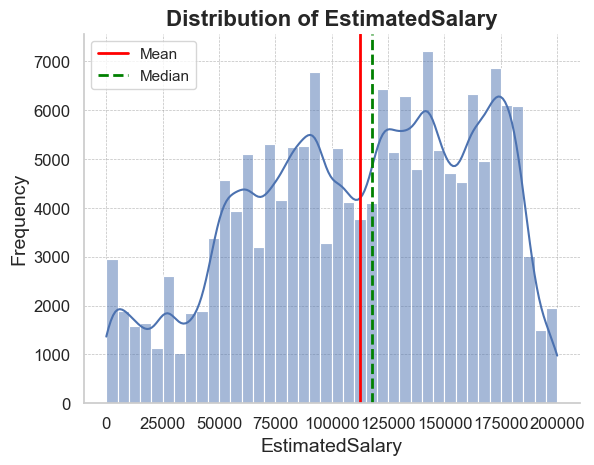

In [306]:
print('The median of the df["EstimatedSalary"] is = ',df['EstimatedSalary'].median())
print('The mean of the df["EstimatedSalary"] is = ',df['EstimatedSalary'].mean())
# Plot the histogram with a kernel density estimate (kde)
ax = sns.histplot(df['EstimatedSalary'], kde=True, color='#4C72B0', bins=40)

# Calculate mean and median
mean_value = df['EstimatedSalary'].mean()
median_value = df['EstimatedSalary'].median()

# Add lines for mean and median
ax.axvline(mean_value, color='red', linestyle='-', linewidth=2, label='Mean')
ax.axvline(median_value, color='green', linestyle='--', linewidth=2, label='Median')

# Set plot title and labels
ax.set_title('Distribution of EstimatedSalary', fontsize=16, fontweight='bold')
ax.set_xlabel('EstimatedSalary', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Customize the grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove the right and top spines for a cleaner look
sns.despine()

# Display a subtle background grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add a legend
ax.legend()

# Show the plot
plt.show()

### **Observation:**
- The minimum estimated salary is $11.58, and the maximum is $199,992.48.
- The mean (average) estimated salary is approximately $112,574.82.
- The median (50th percentile) estimated salary is $117,948.00.
- The mean (112,574.82) is slightly lower than the median (117,948.00)

In [307]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

## What secrets does Exited column hold?

Exited: Whether the customer has churned (1 = yes, 0 = no)

**The "Exited" column has an integer data type, but since it only contains the values 0 and 1, we will treat it as a boolean column.**

In [308]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [309]:
df.groupby(df['Exited'])['Geography'].value_counts()

Exited  Geography
0       France       78643
        Spain        29978
        Germany      21492
1       France       15572
        Germany      13114
        Spain         6235
Name: count, dtype: int64

In [310]:
grouped_data = df.groupby(['Exited', 'Geography']).size().reset_index(name='Count')

# Creating a bar graph using Plotly
fig = px.bar(grouped_data, x='Geography', y='Count', color='Exited',
             labels={'Count': 'Number of Customers', 'Geography': 'Country'},
             title='Exited Customers by Geography',
             category_orders={'Geography': ['France', 'Spain', 'Germany']},
             barmode='group')

# Show the plot
fig.show()

In [311]:
df.groupby(df['Exited'])['HasCrCard'].value_counts()

Exited  HasCrCard
0       1.0          98742
        0.0          31371
1       1.0          25686
        0.0           9235
Name: count, dtype: int64

In [312]:
# Group by 'Tenure' and count 'Exited' values
grouped_data = df.groupby(['Tenure'])['Exited'].value_counts().unstack().fillna(0)

# Reshape the DataFrame for Plotly
grouped_data = grouped_data.reset_index()

# Plotting with Plotly Express
fig = px.bar(grouped_data, x='Tenure', y=[0, 1], color_discrete_sequence=['#4c72b0', '#dd8452'],
             labels={'0': 'Not Exited', '1': 'Exited'},
             title='Exited Customers by Tenure',
             category_orders={'Tenure': sorted(df['Tenure'].unique())},
             )

# Show the plot
fig.show()

### **Observations:**
- Most of the people, around 130,113 individuals, have remained with the bank, indicating that the majority have not left.
- The number of individuals who have left the bank is 34,921.
- A significant portion (25,686) of individuals who have exited still had a credit card (HasCrCard=1.0).
- A smaller portion (9,235) of individuals who have exited did not have a credit card (HasCrCard=0.0).
- The highest counts for individuals who have exited (Exited=1) are observed in the early tenures (0 to 4 years)
- France has the highest count of retained customers, indicating that it has the largest number of customers who continue to use the service.
- Germany has a higher count of exited customers than Spain, but lower than France.

# Checking the correaltion between numeric columns:

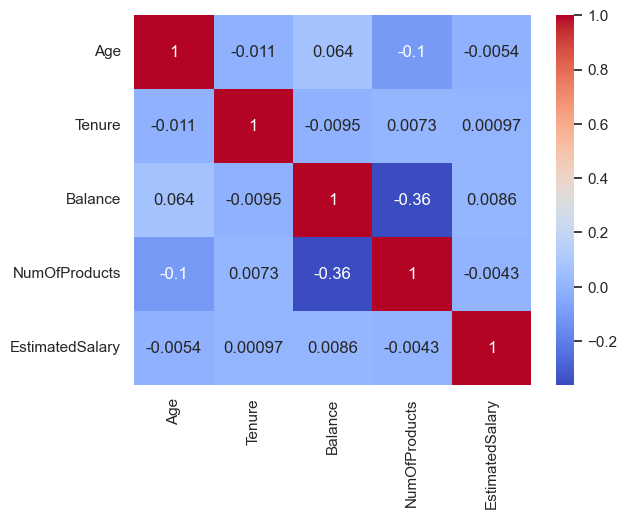

In [313]:
numeric_cols = [ 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']

# check the correaltion between numeric columns:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

### **Observations:**

1. **Higher age is associated with higher estimated salary.** This means that as people get older, their estimated salary tends to increase.
2. **Longer tenure is associated with higher estimated salary.** This means that as people stay with their employer for longer, their estimated salary tends to increase.
3. **Having more products is associated with lower estimated salary.** This means that as people have more products, their estimated salary tends to decrease. However, it's important to note that this could be due to other factors, such as age or income level, influencing both product ownership and salary.
4. **There is a weak negative correlation between balance and estimated salary.** This means that as people have more balance, their estimated salary tends to decrease slightly. However, the strength of this relationship is low, so it's not as clear-cut as the other insights.


# Checking the outliers:


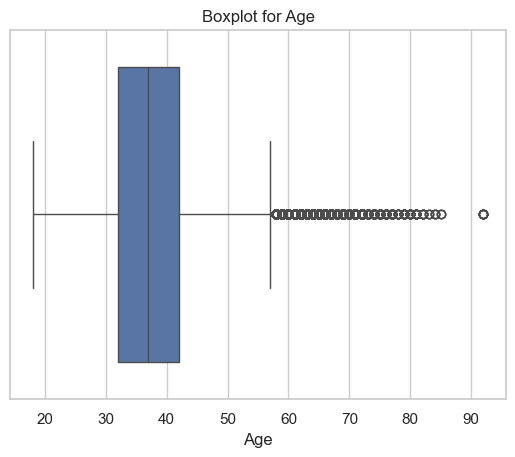

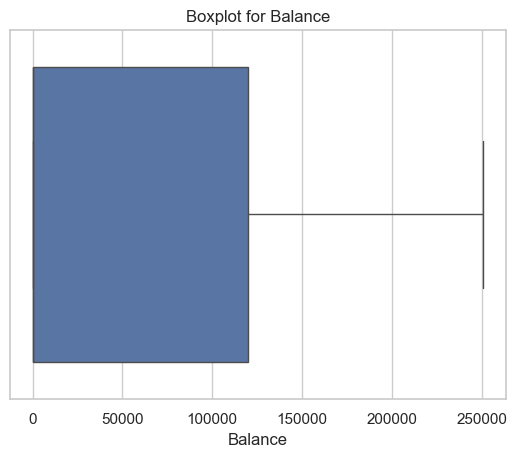

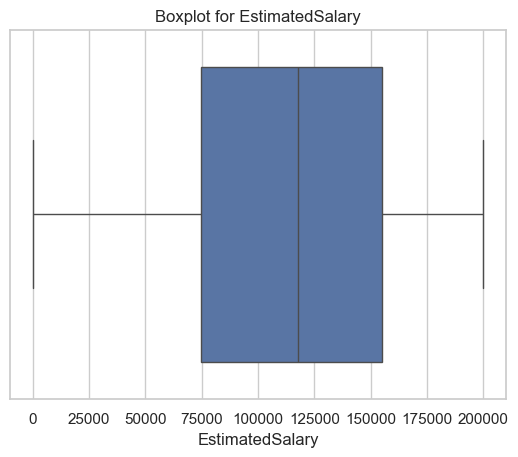

In [314]:
columns_to_plot = ['Age', 'Balance', 'EstimatedSalary']

for column in columns_to_plot:
    sns.boxplot(data=df, x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


### **According to my keen detective skills, it seems like the data doesn't have any troublemaking outliers that we can kick out!**

----

In [ ]:
df_numeric = df.select_dtypes(include=['int', 'float'])


In [ ]:
df_numeric.columns

acutally from the data it is clear that the 'HasCrCard', 'IsActiveMember' and 'Exited' are actually boolean.

In [ ]:
df_numeric

In [ ]:
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df_cat

# Checking outliers:

In [ ]:
print(df_cat.columns)

In [ ]:
categorical_cols = ['Surname','Geography','Gender']
bool_cols = ['HasCrCard', 'IsActiveMember','Exited']
numeric_cols = ['id','CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']

In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Create subplots for each numeric column
fig = go.Figure()

for col in numeric_cols:
    fig.add_trace(go.Box(y=df[col], name=col))

# Set layout
fig.update_layout(title='Box Plots for Numeric Columns',
                  yaxis=dict(title='Values'))

# Show the plot
fig.show()

In [ ]:
df.duplicated().sum()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
columns_to_scale = ['id','CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
min_max_scalers = {}

for col in columns_to_scale:
    # Create a new MinMaxScaler for the column
    scaler = MinMaxScaler()

    # Fit and transform the data
    df[col] = scaler.fit_transform(df[[col]])

    # Store the scaler in the dictionary
    min_max_scalers[col] = scaler

In [ ]:
columns_to_encode = ['Surname','Geography','Gender']

# Dictionary to store LabelEncoders for each column
label_encoders = {}
# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
# there is no duplicate in the data:
X = df.drop(['id','Exited','CustomerId','Surname','Geography'], axis=1)
y = df['Exited'] ``
X_train ,X_test ,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(64, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
     tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(8, activation='relu'),  # Hidden layer
    
    tf.keras.layers.Dense(1,activation='sigmoid')  # Output layer for binary labels
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)



In [ ]:
%%time 
from tensorflow.keras.callbacks import EarlyStopping
# Traning the model:
early_stopping = EarlyStopping(patience=5)
history = model.fit(X_train,y_train,epochs=100,batch_size = 32,verbose =1,validation_data=(X_test, y_test),callbacks=[early_stopping])

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()